Basic script to create plots in pandas


In [ ]:
## import files from dir and generate graphs of Max TF expression vs non-promoter bi-directional MD score

import matplotlib.pyplot as plt
import pandas as pd
import glob
import re

# Enter data directory here
data_dir = '/home/archie/code/DnA/data/test'

# Enter save dir here
out_dir = '/home/archie/code/DnA/out/'

# Main
for filepath in glob.iglob(data_dir + "/HO*.tsv"):
    #Plot
    df = pd.read_csv(filepath, sep='\t')
    dfp = df.plot(y='non-promoterbi_MD', x='max_exp_of_TF', style='o', ylim=(0,0.5))
    #Titles
    regexp = "\/(HO_.*_.*)\."
    Title = re.findall(regexp, filepath)[0]
    dfp.set(xlabel="max expression of TF [log(10) fkpm]", ylabel="MD score", title=Title)
    #Save output as .png
    #fig = dfp.get_figure()
    #fig.savefig(out_dir + Title + "jupyter.png")
#plt.close('all')
  



    


#### Plot and lin. Reg. with pandas and sklearn

In [ ]:
import pandas as pd
import sklearn
from sklearn import linear_model
from matplotlib import pyplot
import numpy as np

# Enter data directory here
data_dir = '/home/archie/code/DnA/data/test/'

# Enter save dir here
out_dir = '/home/archie/code/DnA/out/'

# Main
for filepath in glob.iglob(data_dir + "/HO*.tsv"):
    # Read/Parse data
    df = pd.read_csv(filepath, sep='\t')
    y,x = (np.array(df['non-promoterbi_MD']).reshape(-1,1), np.array(df['max_exp_of_TF']).reshape(-1,1))
    # Train model
    model = linear_model.LinearRegression()
    model.fit(x,y)
    prediction = model.predict(x)
    # visualize
    dfp = df.plot(y='non-promoterbi_MD', x='max_exp_of_TF', style='o', ylim=(0,0.5))
    pyplot.plot(x, prediction)
    # Titles
    regexp = "\/(HO_.*_.*)\."
    Title = re.findall(regexp, filepath)[0]
    dfp.set(xlabel="max expression of TF [log(10) fkpm]", ylabel="MD score", title=Title)
    # Save output as .png
    fig = dfp.get_figure()
    fig.savefig(out_dir + Title + "_jupyter.png")
    #R2 values
    r2 = model.score(x, y)
    print (" R2 " + Title + " = " + str(r2))
    # Residuals
    #dfp = plt.scatter(x, y - prediction)
#plt.close('all')
    
    

# MAIN

#### randomized binning + greater pull-in


In [ ]:
import seaborn
import pandas as pd
import glob
import numpy
import re
import matplotlib.pyplot as plt

# nix that pesky # of figures error
plt.rcParams.update({'figure.max_open_warning': 0})

# Enter data directory here
data_dir = '/home/archie/code/DnA/data/sample/' # test

# Enter save dir here
out_dir = '/home/archie/code/DnA/out/'

# Main
for filepath in glob.iglob(data_dir + "/HO*.tsv"):
    # Get Title
    regexp = "\/(HO_.*_.*)\."
    Title = re.findall(regexp, filepath)[0]
    # Parse
    fields = ['non-promoterbi_MD', 'max_exp_of_TF', 'numtotalbi', 'SRR', 'max_exp_isoform' ]
    df = pd.read_csv(filepath, sep='\t', usecols=fields)
    # create random field for binning (below)
    df['random'] = ''
    # remove rows with numtotalbi reads less than 5000
    for i in range(0, (len(df['non-promoterbi_MD']))):
        if (df.loc[i, 'numtotalbi'] < 5000):
            df = df.drop([i])
        # randomly sort remaining points into bins
        else: df.loc[i, 'random'] = numpy.random.randint(11, size=1)
    print (df)
           


    

#### proof of concept, qcut and cut

In [ ]:
import numpy
import pandas as pd
random = numpy.random.randint(11, size=100)
df = pd.DataFrame(random, columns= ['values'])
df['cut'] = pd.cut(df['values'], 10) 
df['qcut'] = pd.qcut(df['values'], 10, duplicates='drop') 
df.sort_values(by='values', ascending=False, inplace=True)
print (df)

# working area

ZN740_HUMAN.H10MO.D
reg


<Figure size 432x288 with 0 Axes>

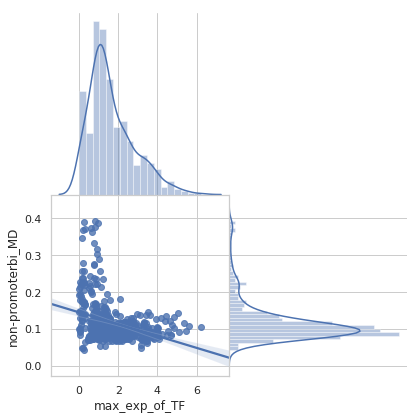

resid


<Figure size 432x288 with 0 Axes>

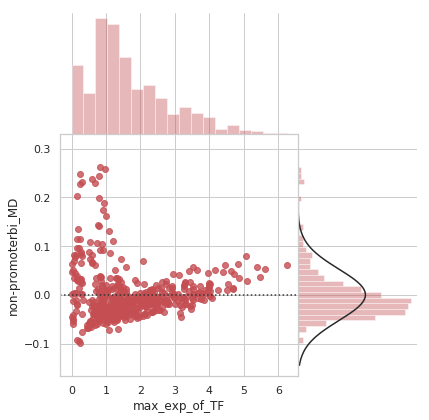

kde


<Figure size 432x288 with 0 Axes>

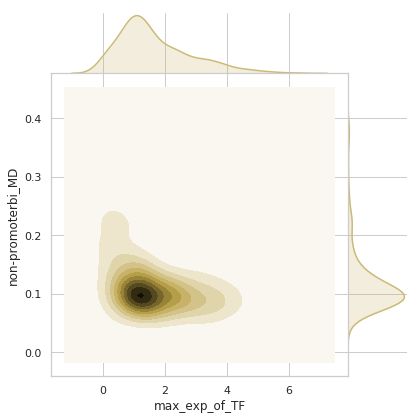

<Figure size 432x288 with 0 Axes>

hex


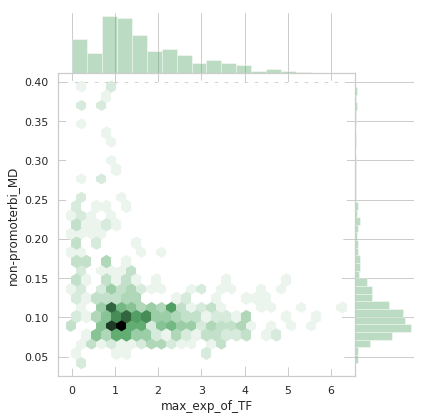

ALX3_HUMAN.H10MO.D
reg


<Figure size 432x288 with 0 Axes>

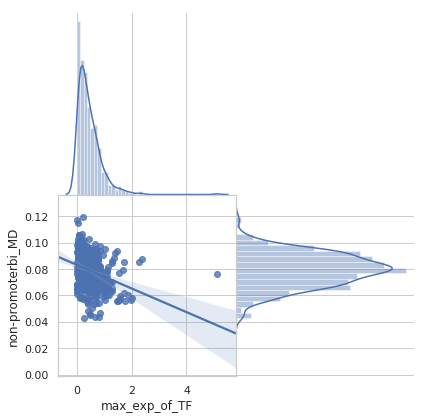

resid


<Figure size 432x288 with 0 Axes>

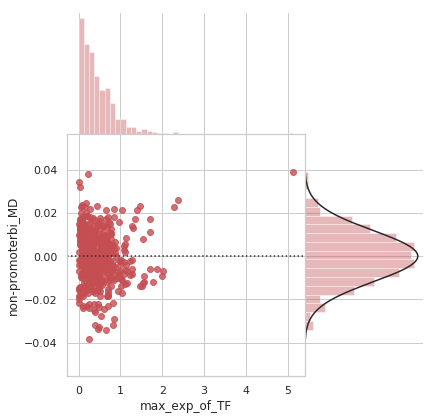

kde


<Figure size 432x288 with 0 Axes>

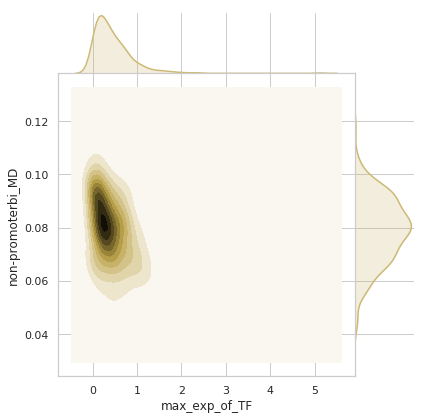

<Figure size 432x288 with 0 Axes>

hex


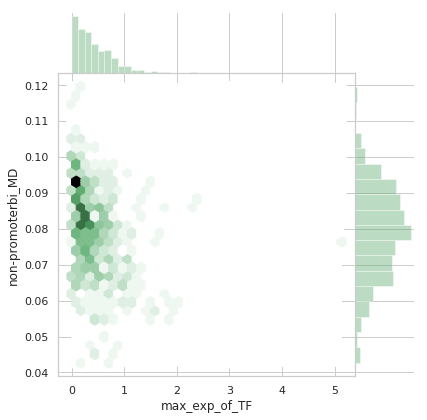

CLOCK_HUMAN.H10MO.D
reg


<Figure size 432x288 with 0 Axes>

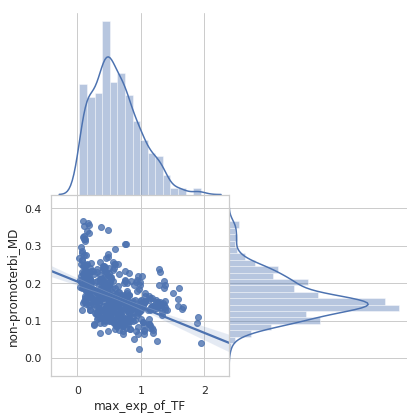

resid


<Figure size 432x288 with 0 Axes>

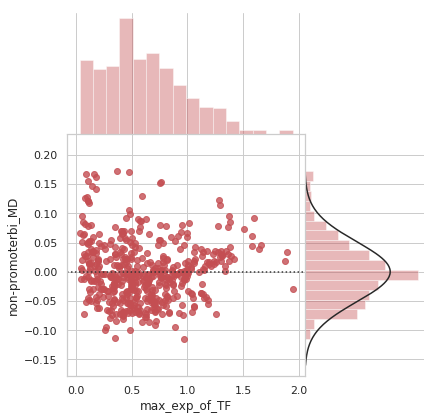

kde


<Figure size 432x288 with 0 Axes>

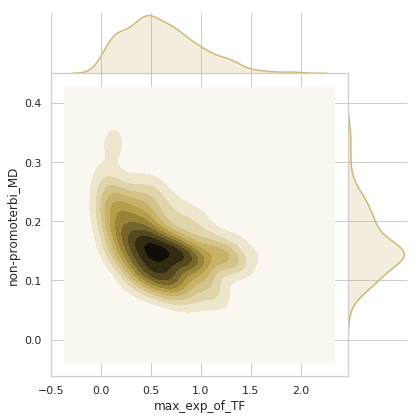

<Figure size 432x288 with 0 Axes>

hex


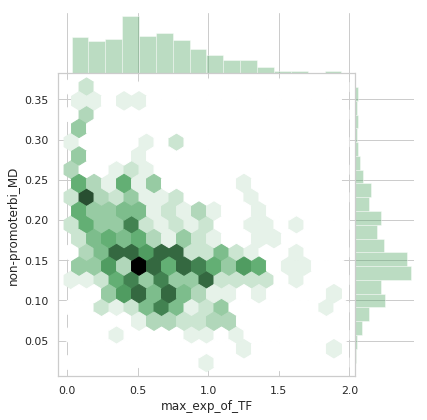

PURA_HUMAN.H10MO.D
reg


<Figure size 432x288 with 0 Axes>

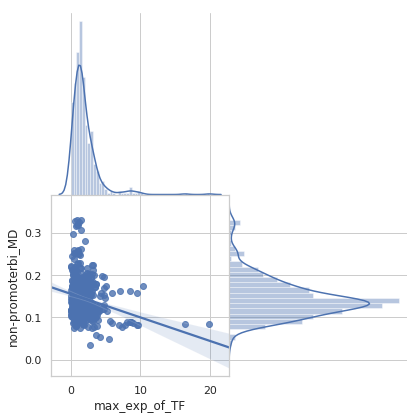

resid


<Figure size 432x288 with 0 Axes>

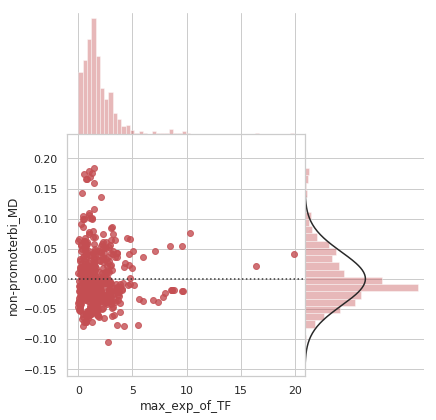

kde


<Figure size 432x288 with 0 Axes>

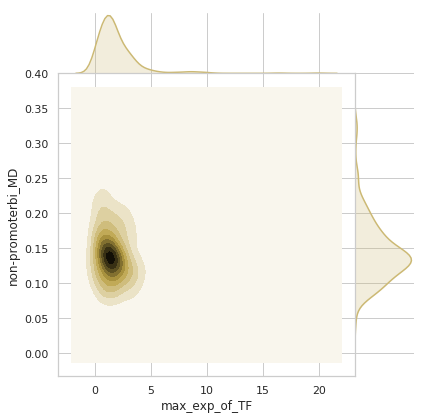

<Figure size 432x288 with 0 Axes>

hex


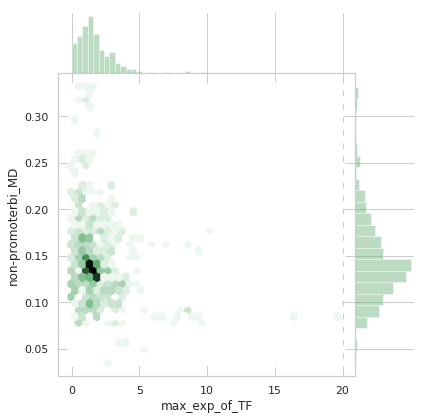

PHX2A_HUMAN.H10MO.D
reg


<Figure size 432x288 with 0 Axes>

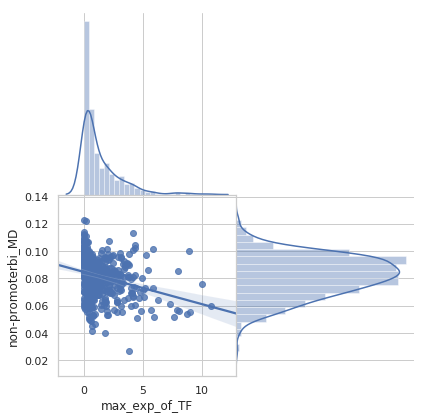

resid


<Figure size 432x288 with 0 Axes>

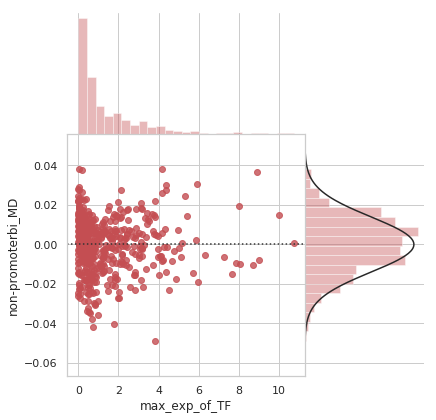

kde


<Figure size 432x288 with 0 Axes>

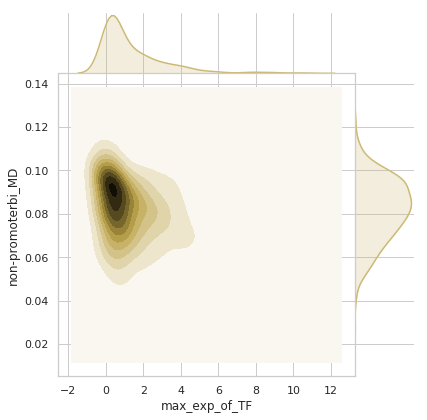

<Figure size 432x288 with 0 Axes>

hex


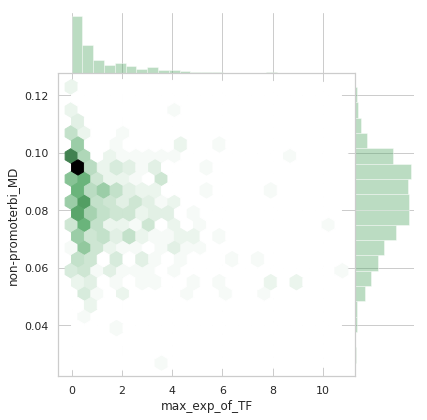

ZN148_HUMAN.H10MO.D
reg


<Figure size 432x288 with 0 Axes>

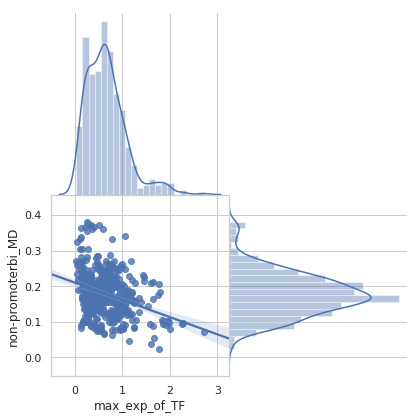

resid


<Figure size 432x288 with 0 Axes>

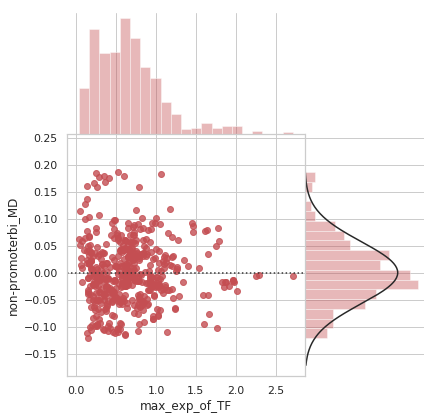

kde


<Figure size 432x288 with 0 Axes>

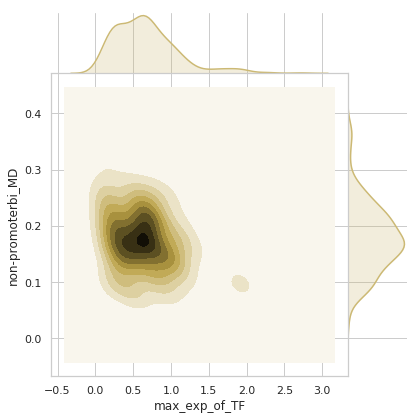

<Figure size 432x288 with 0 Axes>

hex


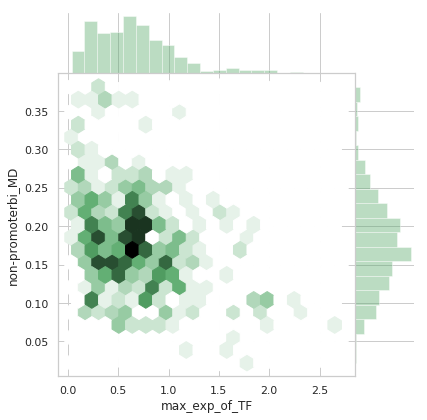

FOXJ3_HUMAN.H10MO.A
reg


<Figure size 432x288 with 0 Axes>

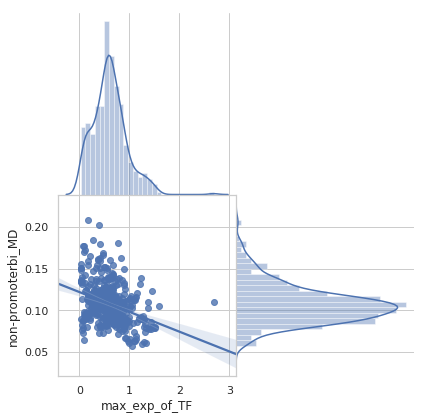

resid


<Figure size 432x288 with 0 Axes>

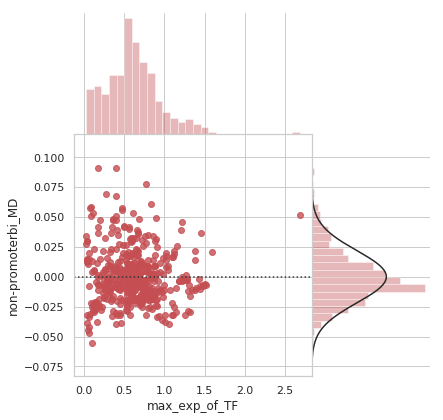

kde


<Figure size 432x288 with 0 Axes>

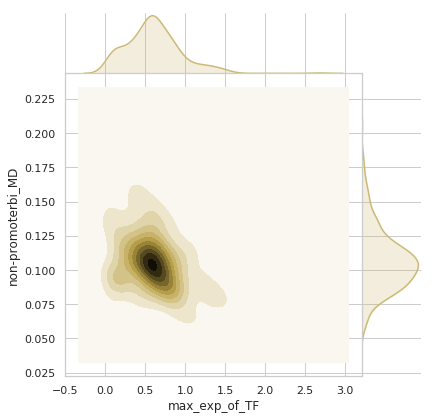

<Figure size 432x288 with 0 Axes>

hex


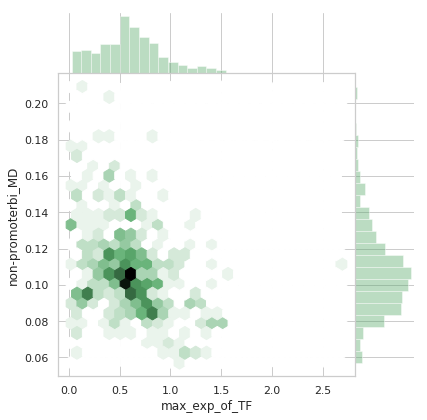

ZN713_HUMAN.H10MO.D
reg


<Figure size 432x288 with 0 Axes>

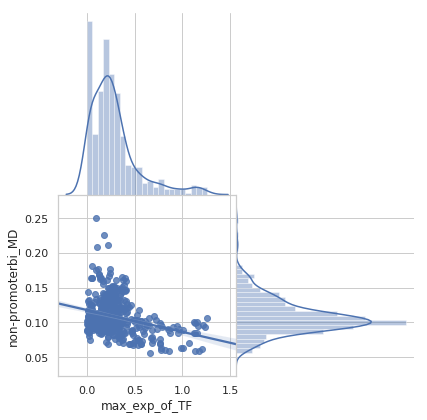

resid


<Figure size 432x288 with 0 Axes>

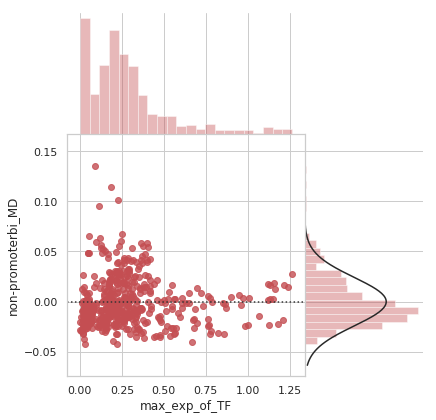

kde


<Figure size 432x288 with 0 Axes>

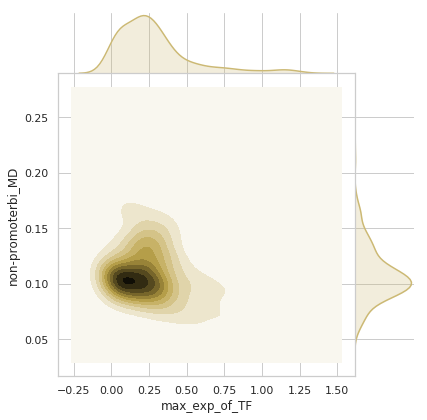

<Figure size 432x288 with 0 Axes>

hex


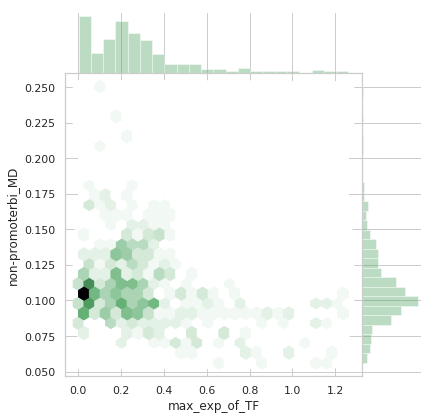

FOXJ3_HUMAN.H10MO.S
reg


<Figure size 432x288 with 0 Axes>

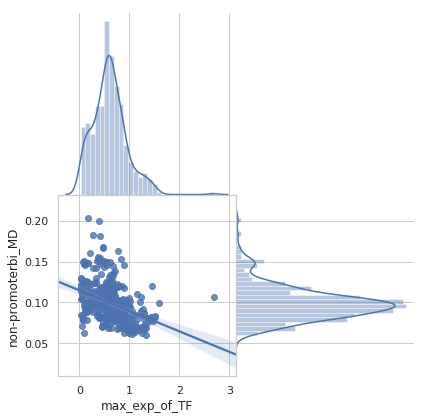

resid


<Figure size 432x288 with 0 Axes>

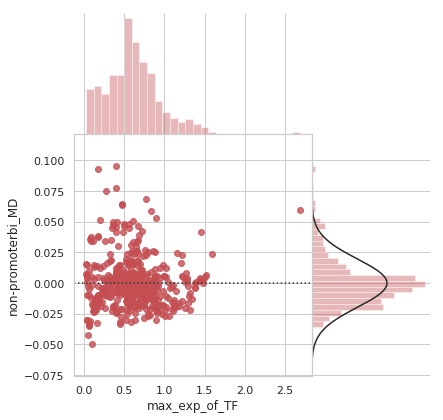

kde


<Figure size 432x288 with 0 Axes>

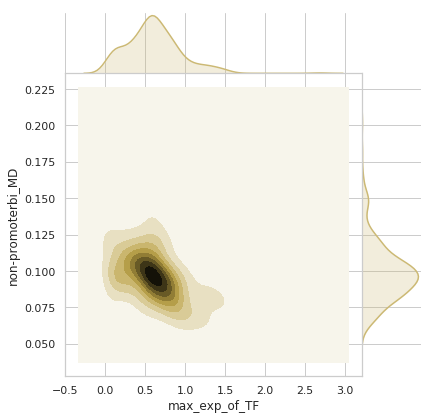

<Figure size 432x288 with 0 Axes>

hex


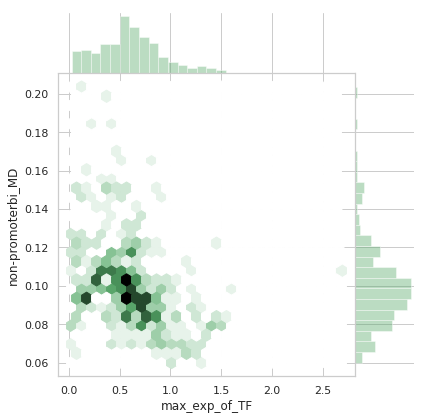

DBP_HUMAN.H10MO.B
reg


<Figure size 432x288 with 0 Axes>

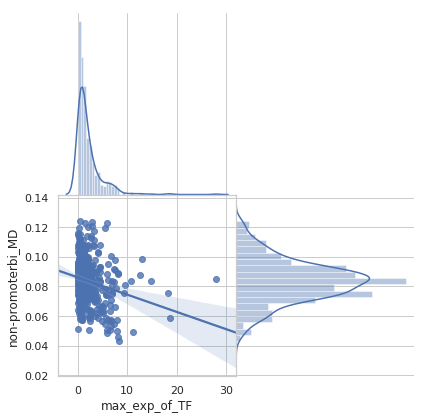

resid


<Figure size 432x288 with 0 Axes>

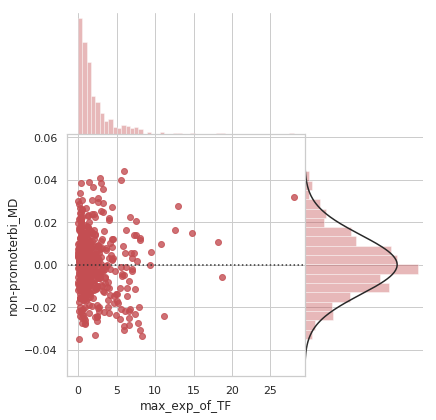

kde


<Figure size 432x288 with 0 Axes>

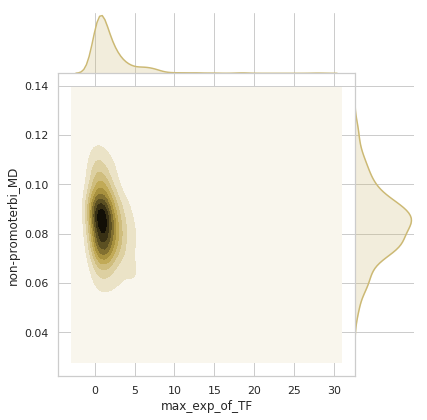

<Figure size 432x288 with 0 Axes>

hex


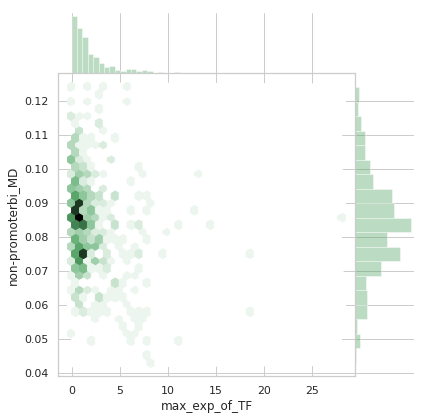

In [13]:
import seaborn
import pandas as pd
import pandas
import glob
import numpy
import re
import matplotlib.pyplot as plt


# nix that pesky # of figures error
plt.rcParams.update({'figure.max_open_warning': 0})

# Enter data directory here
data_dir = '/home/archie/code/DnA/data/repressors/'

# Enter save dir here
out_dir = '/home/archie/code/DnA/out/'

# GC text file here
GCpath = '/home/archie/code/DnA/data/metadata/gcrichdic.txt'


# Main

for filepath in glob.iglob(data_dir + "/HO*.tsv"):
    # Get Title
    regexp = "\/(?:HO_)(.*_.*)\."
    Title = re.findall(regexp, filepath)[0]
   # regexp1 = "\/(?:HO_)(.*)(?:_.*)\." 
   # regexp2 = "\/(?:HO_)(?:.*)(?:_.*)(.[A-Z])\."
   # r1 = re.findall(regexp1, filepath)[0]
   # r2 = re.findall(regexp2, filepath)[0]
   # Title = (r1 +  r2)
    # Parse
    fields = ['non-promoterbi_MD', 'max_exp_of_TF', 'numtotalbi' ]
    df = pd.read_csv(filepath, sep='\t', usecols=fields)
    df['Title'] = Title
    GC = pandas.read_csv(GCpath, sep='\t')
    GC.columns = ['Title', 'GC']
   # df_comb = pandas.merge(GC, df, on='Title', how='outer')
    
    # sort into baseline vs non-baseline
    cutoff = .08
    for i in range(0, (len(df['non-promoterbi_MD']))):
        if df['max_exp_of_TF'][i] < cutoff:
            df.at[i, 'position'] = "baseline"
        else:
            df.at[i, 'position'] = "elevated"
    # remove rows with numtotalbi reads less than 5000
    df = df[df.numtotalbi > 5000]
    
    print (Title)
    print ("reg")
    plt.figure()
    seaborn.jointplot('max_exp_of_TF', 'non-promoterbi_MD', data=df, kind="reg", space=0, color="b", ratio=1)
    plt.show()
    plt.figure()
    print ("resid")   
    seaborn.jointplot('max_exp_of_TF', 'non-promoterbi_MD', data=df, kind="resid", space=0, color="r", ratio=2)
    plt.show()
    plt.figure()
    print ("kde")
    seaborn.jointplot('max_exp_of_TF', 'non-promoterbi_MD', data=df, kind="kde", space=0, color="y")
    plt.figure()
    plt.show()
    print ("hex")
    seaborn.jointplot('max_exp_of_TF', 'non-promoterbi_MD', data=df, kind="hex", space=0, color="g", ratio=5)
    plt.show()





P53_HUMAN.H10MO.B



STATS

mean MD: 0.13268

mean log(fpkm) 1.44802

std lfpkm: 1.13583

CO var lfpkm: 0.7844021491415863

IQR : 1.2339509998154998

elevated    476
baseline     15
Name: position, dtype: int64
reg


<Figure size 432x288 with 0 Axes>

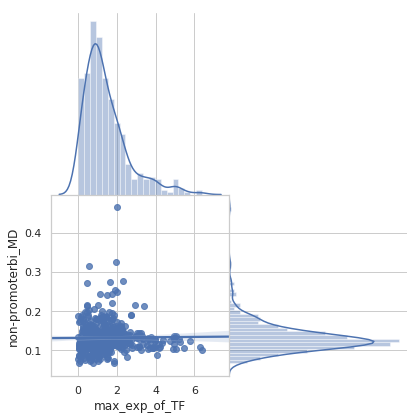

resid


<Figure size 432x288 with 0 Axes>

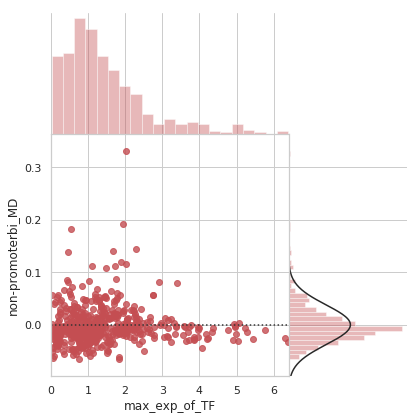

kde


<Figure size 432x288 with 0 Axes>

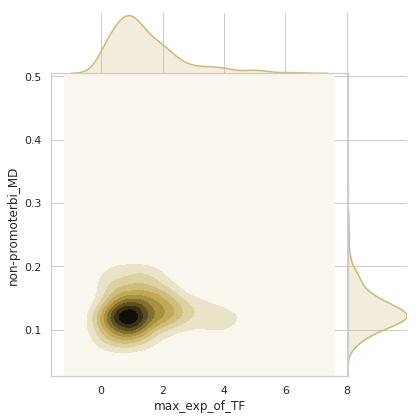

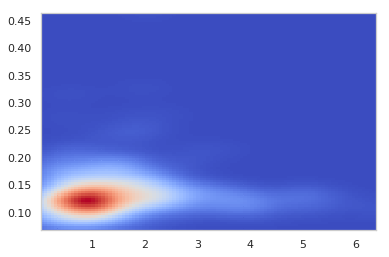


 Violin 



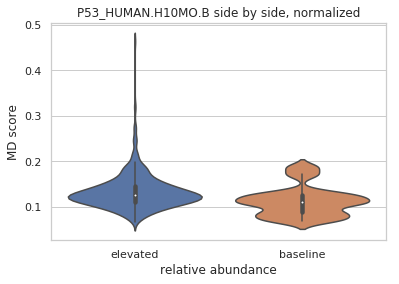

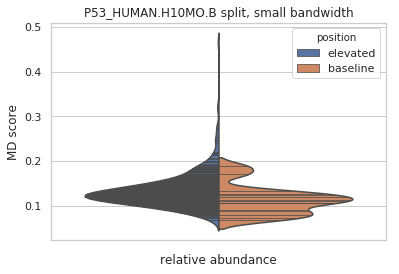

<Figure size 432x288 with 0 Axes>

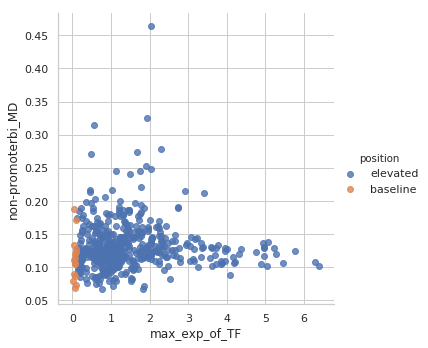


 quartiles and tenths 



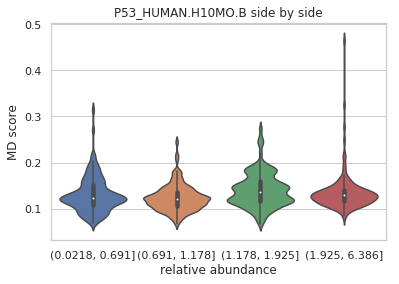

<Figure size 432x288 with 0 Axes>

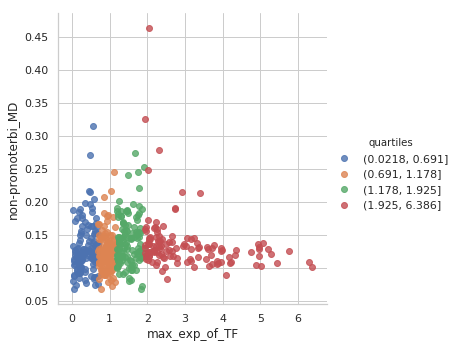

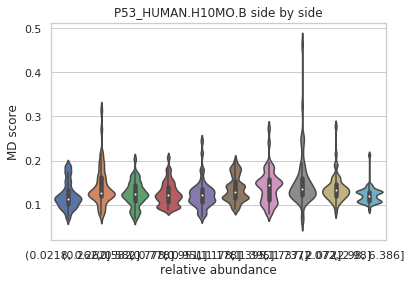

<Figure size 432x288 with 0 Axes>

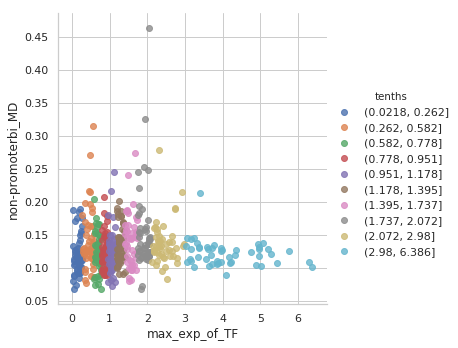

In [4]:
import seaborn
import pandas as pd
import pandas
import glob
import numpy
import re
import matplotlib.pyplot as plt
from scipy.stats import kde


# nix that pesky # of figures error
plt.rcParams.update({'figure.max_open_warning': 0})

# Enter data directory here
data_dir = '/home/archie/code/DnA/data/p53/'

# Enter save dir here
out_dir = '/home/archie/code/DnA/out/'

# GC text file here
GCpath = '/home/archie/code/DnA/data/metadata/gcrichdic.txt'


# Main

for filepath in glob.iglob(data_dir + "/HO*.tsv"):
    # Get Title
    regexp = "\/(?:HO_)(.*_.*)\."
    Title = re.findall(regexp, filepath)[0]
   # regexp1 = "\/(?:HO_)(.*)(?:_.*)\." 
   # regexp2 = "\/(?:HO_)(?:.*)(?:_.*)(.[A-Z])\."
   # r1 = re.findall(regexp1, filepath)[0]
   # r2 = re.findall(regexp2, filepath)[0]
   # Title = (r1 +  r2)
    # Parse
    fields = ['non-promoterbi_MD', 'max_exp_of_TF', 'numtotalbi' ]
    df = pd.read_csv(filepath, sep='\t', usecols=fields)
    df['Title'] = Title
    GC = pandas.read_csv(GCpath, sep='\t')
    GC.columns = ['Title', 'GC']
   # df_comb = pandas.merge(GC, df, on='Title', how='outer')
    
    # sort into baseline vs non-baseline
    cutoff = .1
    for i in range(0, (len(df['non-promoterbi_MD']))):
        if df['max_exp_of_TF'][i] < cutoff:
            df.at[i, 'position'] = "baseline"
        else:
            df.at[i, 'position'] = "elevated"
    # remove rows with numtotalbi reads less than 5000
    df = df[df.numtotalbi > 5000]
    
    # Output
    print ("\n\n\n" + Title + "\n\n\n")
    
    # stats
    print ("STATS\n")
    mean_MD = round(df['non-promoterbi_MD'].mean(), 5)
    mean_lfpkm = round(df['max_exp_of_TF'].mean(), 5)
    std_lfpkm = round(df['max_exp_of_TF'].std(), 5)
    co_var_lfpkm = (std_lfpkm / mean_lfpkm)
    Q1 = df['max_exp_of_TF'].quantile(0.25)
    Q3 = df['max_exp_of_TF'].quantile(0.75)
    IQR = (Q3 - Q1)
    print ("mean MD: " + str(mean_MD) + "\n")
    print ("mean log(fpkm) " + str(mean_lfpkm) + "\n")
    print ("std lfpkm: " + str(std_lfpkm) + "\n")
    print ("CO var lfpkm: " + str(co_var_lfpkm) + "\n")
    print ("IQR : " + str(IQR) + "\n")
    print (df['position'].value_counts())
    
    print ("reg")
    plt.figure()
    seaborn.jointplot('max_exp_of_TF', 'non-promoterbi_MD', data=df, kind="reg", space=0, color="b", ratio=1)
    plt.autoscale(enable=True, axis='both', tight=True)
    plt.show()
    plt.figure()
    print ("resid")   
    seaborn.jointplot('max_exp_of_TF', 'non-promoterbi_MD', data=df, kind="resid", space=0, color="r", ratio=2)
    plt.autoscale(enable=True, axis='both', tight=True)
    plt.show()
    plt.figure()
    print ("kde")
    seaborn.jointplot('max_exp_of_TF', 'non-promoterbi_MD', data=df, kind="kde", space=0, color="y")
    plt.autoscale(enable=True, axis='both', tight=True)
    plt.show()
    
    x=df['max_exp_of_TF']
    y=df['non-promoterbi_MD']
    nbins=100
    k = kde.gaussian_kde([x,y])
    plt.autoscale(enable=True, axis='both', tight=True)
    xi, yi = numpy.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(numpy.vstack([xi.flatten(), yi.flatten()]))
 
    # Make the plot
    plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap='coolwarm')
    plt.autoscale(enable=True, axis='both', tight=True)
    plt.show()
   
    print ("\n Violin \n")
    seaborn.set(style="whitegrid")
    # violin - side by side, scaled 
    #  > for comparing mean and population sizes
    fig1 = seaborn.violinplot(y='non-promoterbi_MD', x='position', data=df, orient='v', scale="width", bw=.25)# scale="count" )
    fig1.set(xlabel="relative abundance", ylabel="MD score", title=Title + " side by side, normalized")
    plt.show()
    
    # violin - split, medium bandwidth, density lines
    #  > for comparing shapes
    plt.figure()
    df['x'] = ""
    fig1 = seaborn.violinplot(y='non-promoterbi_MD', x='x', data=df, orient='v', hue='position', split=True, \
                          inner='stick', bw=.3, scale="width")
    fig1.set(xlabel="relative abundance", ylabel="MD score", title=Title + " split, small bandwidth")
    plt.show()
    
    # scatter - colored by baseline vs non-baseline
    # > for comparing b vs non-b
    plt.figure()
    seaborn.lmplot( y="non-promoterbi_MD", x="max_exp_of_TF", data=df, hue='position', fit_reg=False) 
    plt.show()
    
    print ("\n quartiles and tenths \n")
    # violin - split into quartiles, tight bandwidth
    # > for observing trends that coordinate with rising expression levels
    df['quartiles'] = pd.qcut(df['max_exp_of_TF'], 4, duplicates='drop')        
    plt.figure()
    fig1 = seaborn.violinplot(y='non-promoterbi_MD', x='quartiles', data=df, orient='v', bw=.2, scale="width")
    fig1.set(xlabel="relative abundance", ylabel="MD score", title=Title + " side by side")
    plt.show()
    
    # scatter,  color-coded by quartile
    # > for comparing quartile placement
    plt.figure()
    seaborn.lmplot( y="non-promoterbi_MD", x="max_exp_of_TF", data=df, hue='quartiles', fit_reg=False) 
    #plt.ylim(0, 0.5)
    plt.show()
    
    # violin - split into tenths, tight bandwidth
    # > for observing trends that coordinate with rising expression levels
    df['tenths'] = pd.qcut(df['max_exp_of_TF'], 10, duplicates='drop')        
    plt.figure()
    fig1 = seaborn.violinplot(y='non-promoterbi_MD', x='tenths', data=df, orient='v', bw=.2, scale="width")
    fig1.set(xlabel="relative abundance", ylabel="MD score", title=Title + " side by side")
    #plt.ylim(0,0.4)
    plt.show()
    
    # scatter,  color-coded by tenth
    # > for comparing quartile placement
    plt.figure()
    seaborn.lmplot( y="non-promoterbi_MD", x="max_exp_of_TF", data=df, hue='tenths', fit_reg=False)
    #plt.ylim(0, 0.5)
    plt.show()
    
    print ("\n\n\n")
     
    
